In [16]:
import numpy as np
import pandas as pd
import sklearn
import autograd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [17]:
Macro=pd.read_csv('macro - CPIAUCSL.csv')

In [18]:
print(Macro.head(5))

print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

print('Variables are as follows:')
print('DATE=date in dd/m/yy format,')
print('CPIAUCSL= consumer price index for all urban consumers (US),')
print('BUSLOANS=business loan rate (US),')
print('GDPC1= real GDP (US),')
print('FEDFUNDS= federal funds rate,')
print('UNRATE= unemployment rate,')
print('R/D= binary variable for government of day {1=republican, 0=democratic}')


print('~~~~~~Data sourced from FRED~~~~~~~')

        DATE  CPIAUCSL  BUSLOANS   GDPC1  FEDFUNDS  UNRATE  R/D
0   7/1/1954    26.840   22.4539  2559.4      1.03     6.0    1
1  10/1/1954    26.757   22.6042  2609.3      0.99     5.3    1
2   1/1/1955    26.793   22.9938  2683.8      1.34     4.7    1
3   4/1/1955    26.757   23.7303  2727.5      1.50     4.4    1
4   7/1/1955    26.777   24.9522  2764.1      1.94     4.1    1
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Variables are as follows:
DATE=date in dd/m/yy format,
CPIAUCSL= consumer price index for all urban consumers (US),
BUSLOANS=business loan rate (US),
GDPC1= real GDP (US),
FEDFUNDS= federal funds rate,
UNRATE= unemployment rate,
R/D= binary variable for government of day {1=republican, 0=democratic}
~~~~~~Data sourced from FRED~~~~~~~


## I want to perform principle component analysis on the quantitative variables here

## I really need to normalise the data to account for difference in units of measurement and magnitude

## PCA is a way of taking (potentially correlated) variables   and to represent them in in space as linerally uncorrelated vectors (principle components) in order of amount of variance explained.

In [19]:
Macro=Macro.ix[:,Macro.columns!= 'DATE'] #remove non-quantitative variables (date)

rescaledX = (Macro - Macro.mean()) / Macro.std()
#This normalises the data

MacroX=pd.DataFrame(rescaledX) #this is rescaled data: between 0 and 1
MacroX.columns=['CPIAUCSL','BUSLOANS','GDPC1','FEDFUNDS','UNRATE','R/D']

In [20]:
pca=PCA(n_components=3) #somewhat arbitrary. Could make a cutoff point (<5% explained)
pca.fit(MacroX)

PCA(copy=True, n_components=3, whiten=False)

In [21]:
PC1 = np.array(pca.components_[0])
PC2 = np.array(pca.components_[1])
PC3 = np.array(pca.components_[2])

print('Variance explained  by principle components is:', pca.explained_variance_ratio_) 

Variance explained  by principle components is: [ 0.53848114  0.1934321   0.14010165]


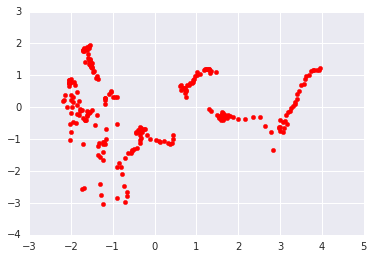

In [22]:
TranfX=pca.transform(MacroX)

plt.scatter(TranfX[:,0],TranfX[:,1], color='red')

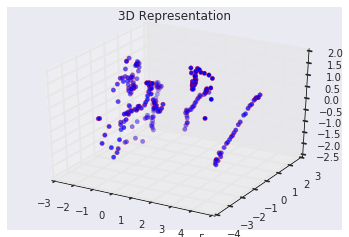

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(TranfX[:,0],TranfX[:,1],TranfX[:,2],color='red')
plt.title('3D Representation')

## Each PC is a linear combination of our variables:

$PC_{j}= \beta_{1}^{j}X_{1}+\beta_{2}^{j}X_{2}+...+\beta_{k}^{j}X_{k}$ 

## for k variables (6 in our case)

In [24]:
#Returning coefficients of principle component 

i = np.identity(MacroX.shape[1])  # identity matrix
i

coef=pca.transform(i)
coef

pd.DataFrame(coef, columns=['PC-1', 'PC-2','PC-3'], index=MacroX.columns)

,PC-1,PC-2,PC-3
CPIAUCSL,0.542819,-0.124651,0.086928
BUSLOANS,0.543103,-0.036021,0.116580
GDPC1,0.542091,-0.083285,0.129608
FEDFUNDS,-0.282507,-0.418017,-0.021752
UNRATE,0.117228,-0.660094,-0.676102
R/D,-0.151561,-0.604786,0.710258


# Analysing the components:

## PC1 has CPIAUCSL, BUSLOANS and GDPC1 as important factors. The other 3 are less represented here. PC1 represents ~53% of the total variation.

## PC2 has UNRATE and R/D as the most important factors, followed by FEDFUNDS. This PC represenst ~19% of total variation explained

## PC3 has R/D as a very important factor. PC3 represents ~14% of total variation explained.

In [25]:
np.linalg.norm(coef,axis=0) #this confirms that the principle components 
                            #indeed have a variance of 1- just making sure 
                            #being valid here

array([ 1.,  1.,  1.])

## Some more visualisation (not PCA, just of the data.).

In [26]:
#get Keras working: "Input" not working
#allocate to Monday, or another day with time.

In [27]:
import seaborn as sns
import scipy
from scipy import stats, integrate
import matplotlib.pyplot as plt

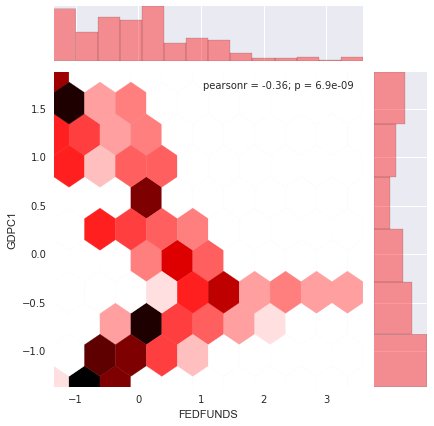

In [52]:
def hexal(var1,var2): #Funtion which draws binomial hex graph.
    hexo=sns.jointplot(x=MacroX[var1], y=MacroX[var2], kind="hex", color="red")
    return(hexo)

hexal('FEDFUNDS', 'GDPC1')




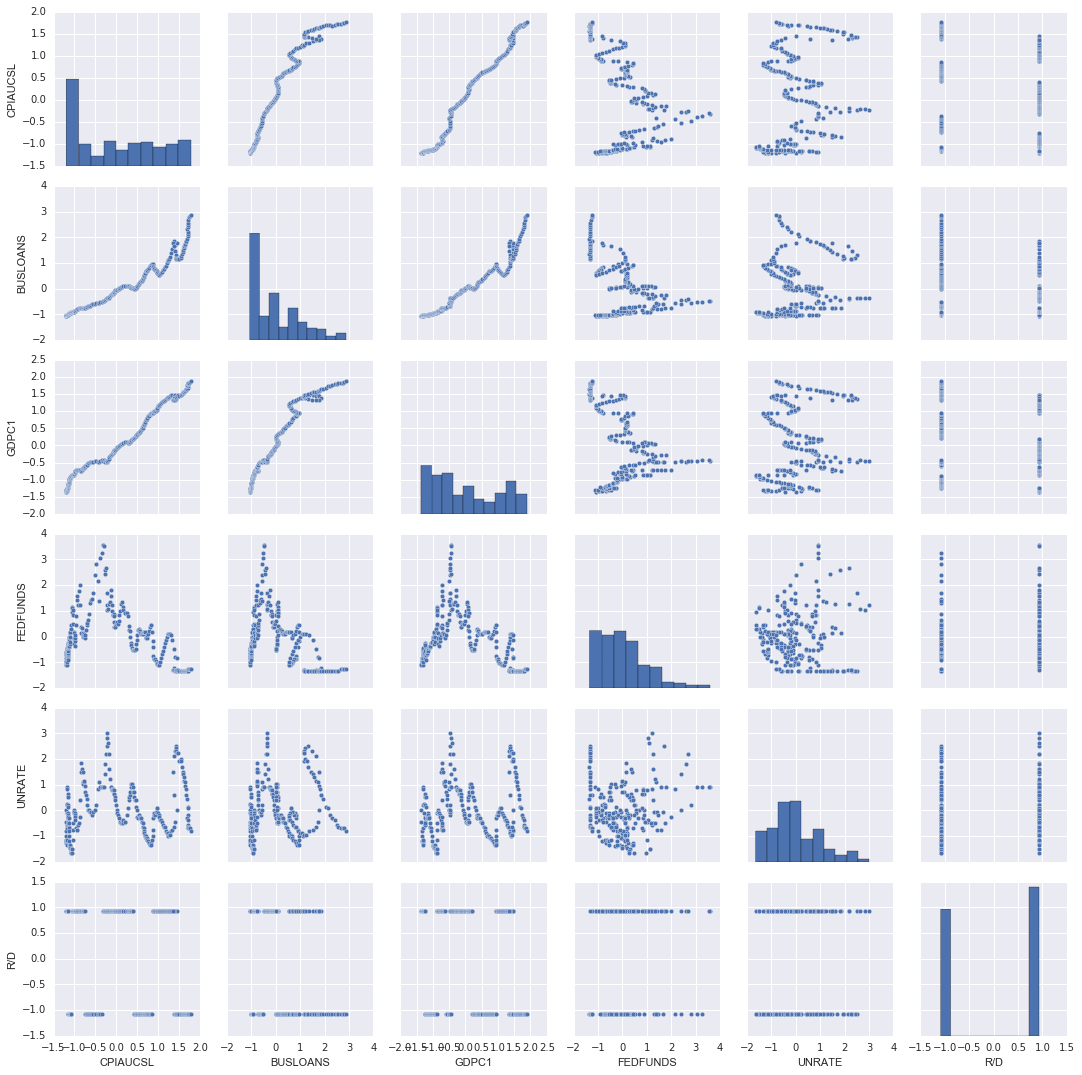

In [43]:
sns.pairplot(MacroX);